### Objective

Streamist is currently focusing on the anime available in their portal and wants to identify the most important factors involved in rating an anime.  As a data scientist at Streamist, you are tasked with analyzing the  portal's anime data and identifying the important factors by building a predictive model to predict the rating of an anime.



### Variables

1. title: title of the anime
2. mediaType: format of publication
3. eps: number of episodes (movies are considered 1 episode)
4. duration: duration of an episode in minutes
5. startYr: the year that airing started
6. finishYr: the year that airing finished
7. description: the synopsis of the plot
8. contentWarn: content warning
9. watched: number of users that completed it
10. watching: number of users that are watching it
11. rating: average user rating
12. votes: number of votes that contribute to the rating
13. studio_primary: studios responsible for creation
14. studios_colab: whether there was a collaboration between studios for anime production
15. genre: genre to which the anime belongs

## Importing necessary libraries

In [3]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# linear regression_model
import statsmodels.api as sm

# For checking model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# for importing file to Google colab notebook


#from google.colab import files
#try:
#    data
#except NameError:
#    data = files.upload()

## Loading the dataset

In [5]:
anime = pd.read_csv("anime_ratings_data.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [6]:
anime.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


* The dataset contains information about different anime
* Many anime seem to have a single episode only, which are movies
* Description seems to be missing for some anime

### Checking the shape of the dataset

In [7]:
anime.shape

(6523, 15)

* The dataset contains information (15 attributes) about 6523 anime

### Checking the data types of the columns for the dataset

In [8]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


* There are 8 numeric (*float* and *int* type) and 7 string (*object* type) columns in the data
* The target variable is the rating of an anime, which is of *float* type

### Statistical summary of the dataset

In [9]:
anime.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,6523.0,8.716235,11.002479,1.000,1.000,1.000,12.000,34.000
duration,6248.0,18.396287,20.949350,1.000,5.000,7.000,25.000,67.000
startYr,6523.0,2005.241147,12.911035,1967.000,2000.000,2010.000,2015.000,2020.000
finishYr,6523.0,2005.575349,12.568169,1970.000,2000.000,2010.000,2015.000,2020.000
watched,6523.0,1347.948643,1737.138112,5.000,56.000,349.000,2252.500,4649.000
watching,6523.0,57.445654,76.527405,0.000,2.000,13.000,98.000,199.000
rating,6523.0,2.962553,0.760486,1.111,2.371,2.944,3.568,4.702
votes,6496.0,906.253233,1171.677648,10.000,34.000,227.500,1567.750,3100.000


* The anime ratings vary between 1.1 and 4.7, which suggests that the anime were rated on a scale of 0-5
* The general rating of anime is 2.96
* The number of views for the anime in the data varies from 5 to ~5000
* The number of votes received by an anime in the data varies from 10 to 3100

In [10]:
anime.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


* *TV* is the most occurring type of media.

### Checking for duplicate values

In [11]:
anime.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [13]:
anime.isna().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

* There are missing values in `mediaType`, `duration`, `description`, and `votes` columns.

In [14]:
# creating a copy of the data so that original data remains unchanged
anime_copy = anime.copy()

## Exploratory Data Analysis (EDA) 

In [15]:
# creating a list of numerical columns
num_cols = anime_copy.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("startYr")
num_cols.remove("finishYr")

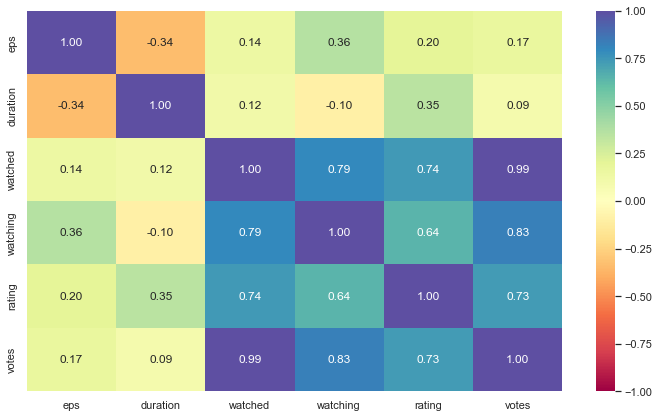

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    anime_copy[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Anime available as web series or music videos have a lower rating in general

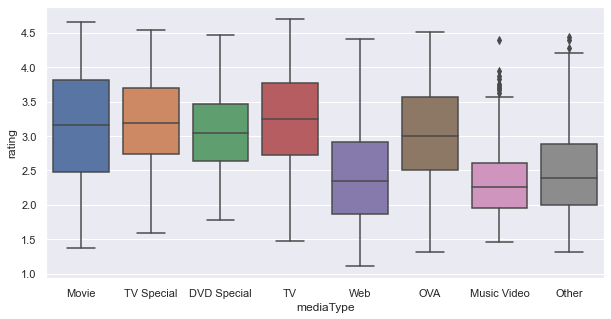

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=anime_copy, x="mediaType", y="rating")
plt.show()

* Anime under the genre of Drama are rated the highest in general, while those under the genre of Comedy and rated the least

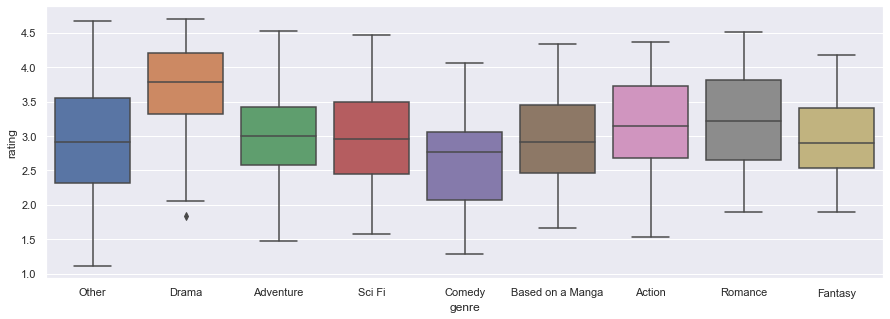

In [18]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=anime_copy, x="genre", y="rating")
plt.show()

* Anime under the genres of Drama and Romance have higher viewership in general

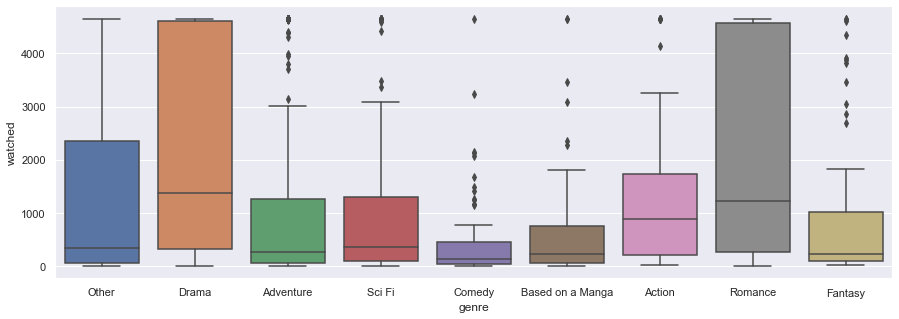

In [19]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=anime_copy, x="genre", y="watched")
plt.show()

* Anime from the Drama and Romance genres are being watched more in general

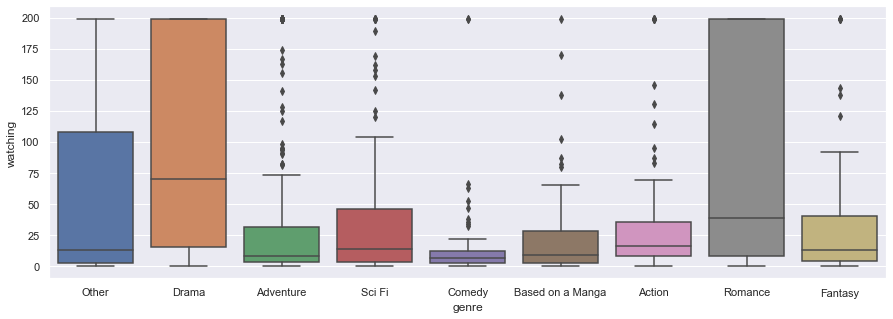

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=anime_copy, x="genre", y="watching")
plt.show()

* Anime released as movies or TV speicals have the highest duration while music videos have the lowest, which is expected

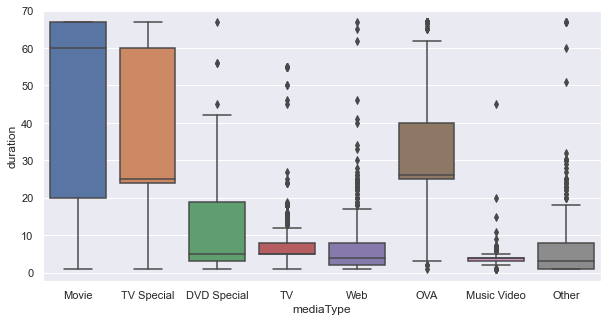

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=anime_copy, x="mediaType", y="duration")
plt.show()

## Data Preprocessing

### Missing Value Treatment

In [22]:
anime_copy.isna().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

Let's fix the missing values in the data.

- `mediaType`, impute the missing values with '*Other*'
- `duration` and `votes`, we will impute the missing values in each column with the median grouped by `genre` and `mediaType`

In [23]:
anime_copy.mediaType.fillna("Other", inplace=True)

In [38]:
anime_copy["duration"] = anime_copy["duration"].fillna(
    value=anime_copy.groupby(["genre", "mediaType"])["duration"].transform("median")
)
anime_copy["votes"] = anime_copy["votes"].fillna(
    value=anime_copy.groupby(["genre", "mediaType"])["votes"].transform("median")
)


In [39]:
anime_copy.isna().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

* We will impute the remaining missing values in the `duration` column with the median grouped by `genre`

In [41]:
anime_copy["duration"] = anime_copy["duration"].fillna(
    value=anime_copy.groupby(["genre"])["duration"].transform("median")
)

In [42]:
anime_copy.isna().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

- All the missing values have been treated.

### Feature Engineering

* Create a new feature `years_running` by taking the difference between `finishYr` and `startYr` columns
* Drop the original columns once the new feature is created 

In [43]:
anime_copy["years_running"] = anime_copy["finishYr"] - anime_copy["startYr"]
anime_copy.drop(["startYr", "finishYr"], axis=1, inplace=True)
anime_copy.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


In [44]:
anime_copy.drop(["title", "description"], axis=1, inplace=True)
anime_copy.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


### Data Preparation for Modeling

- Our aim is to predict the rating of an anime
- Before building the model, we'll encode our categorical features by using `One Hot Encoding`

In [46]:
# defining X (Independent) and y (Dependent) variables
X = anime_copy.drop(["rating"], axis=1)
y = anime_copy["rating"]

print(X.head())
print(y.head())

     mediaType  eps  duration contentWarn  watched  watching   votes  \
0        Movie    1      67.0          No     4649        86  3100.0   
1        Movie    1       5.0          No       10         0    10.0   
2   TV Special    1      46.0          No     1630        16  1103.0   
3        Movie    1      67.0          No     4649       184  3100.0   
4  DVD Special    1       4.0          No      346         8   234.0   

   studio_primary studios_colab  genre  years_running  
0  Toei Animation            No  Other              0  
1          Others            No  Other              0  
2          Others            No  Other              0  
3          Others            No  Drama              0  
4          Others            No  Other              0  
0    3.979
1    2.120
2    3.758
3    4.444
4    2.494
Name: rating, dtype: float64


In [47]:
# let's add the intercept to data
X = sm.add_constant(X)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1.0,1,5.0,10,0,10.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,46.0,1630,16,1103.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,1,67.0,4649,184,3100.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1,4.0,346,8,234.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4566
Number of rows in test data = 1957


## Model Building - Linear Regression

In [51]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:49:20   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.722**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **2.7707**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `duration` is **0.0123**.

### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [52]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [53]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40112,0.330417,0.722387,0.720304,12.444742


In [54]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.413096,0.340426,0.703053,0.6978,12.56679
